In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [2]:
df = pd.read_csv('C:/USERS/YASHN/CENSUS_INCOME.CSV')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
# Checking dimensions
df.shape

(32560, 15)

In [6]:
# Checking the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
# Checking the type of the columns
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [8]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [9]:
# Checking the null values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There are no null values in our dataset.

But, we do have values with ?, which we need to fill.

In [10]:
df.loc[df['Occupation'] == ' ?' ]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [11]:
df.loc[df['Workclass'] == ' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In the dataset, we can see  '?' in the columns workplace and occupation.

<AxesSubplot:>

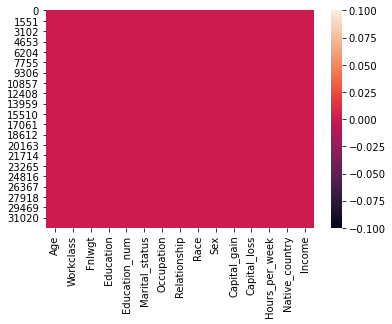

In [12]:
# Plotting heatmap
sns.heatmap(df.isnull())

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fnlwgt'}>,
        <AxesSubplot:title={'center':'Education_num'}>,
        <AxesSubplot:title={'center':'Capital_gain'}>],
       [<AxesSubplot:title={'center':'Capital_loss'}>,
        <AxesSubplot:title={'center':'Hours_per_week'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

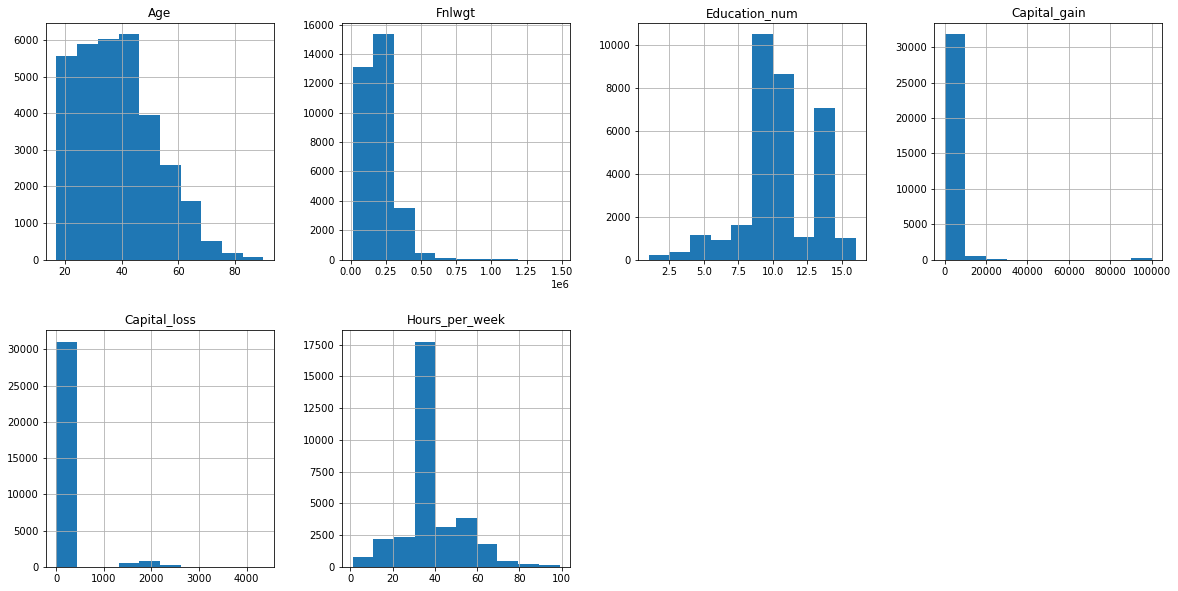

In [13]:
# Data Visualisation
# plotting histogram
df.hist(figsize = (20,10), layout = (2,4))

In [14]:
# Statistical Summary
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [15]:
# Checking the value counts
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

<AxesSubplot:xlabel='Workclass', ylabel='count'>

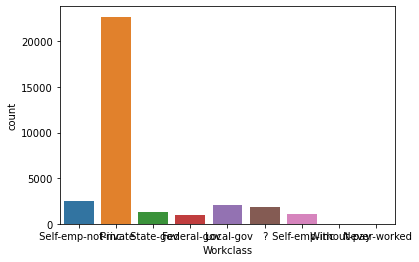

In [16]:
sns.countplot(df['Workclass'])

In [17]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

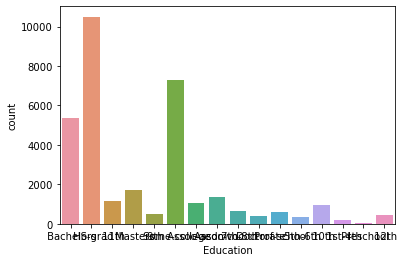

In [18]:
sns.countplot(df['Education'])

In [19]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

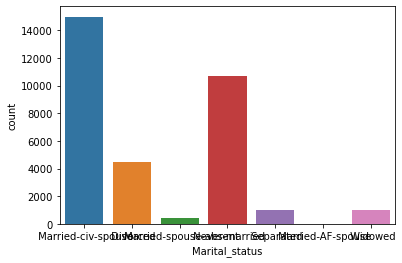

In [20]:
sns.countplot(df['Marital_status'])

In [21]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

<AxesSubplot:xlabel='Occupation', ylabel='count'>

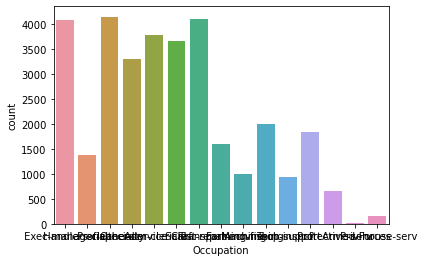

In [22]:
sns.countplot(df['Occupation'])

In [23]:
df['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

<AxesSubplot:xlabel='Relationship', ylabel='count'>

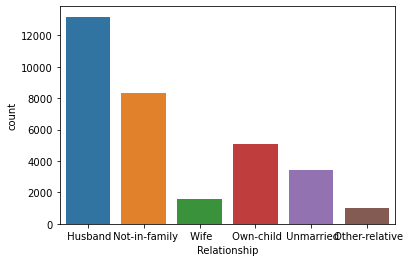

In [24]:
sns.countplot(df['Relationship'])

In [25]:
df['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

<AxesSubplot:xlabel='Race', ylabel='count'>

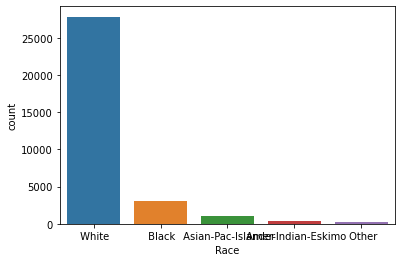

In [26]:
sns.countplot(df['Race'])

In [27]:
df['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

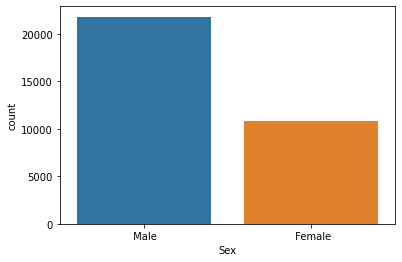

In [28]:
sns.countplot(df['Sex'])

In [29]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

<AxesSubplot:xlabel='Native_country', ylabel='count'>

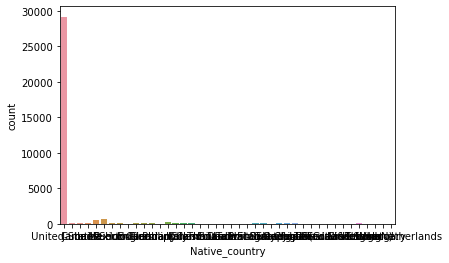

In [30]:
sns.countplot(df['Native_country'])

In [31]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='count'>

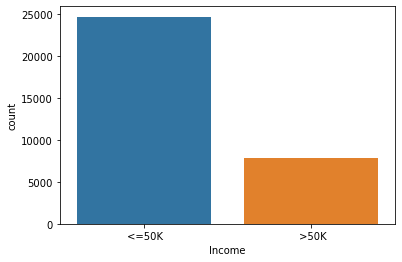

In [32]:
sns.countplot(df['Income'])

The proportion of records having income less than 50K  is more than the proportion of records having more than 50k.

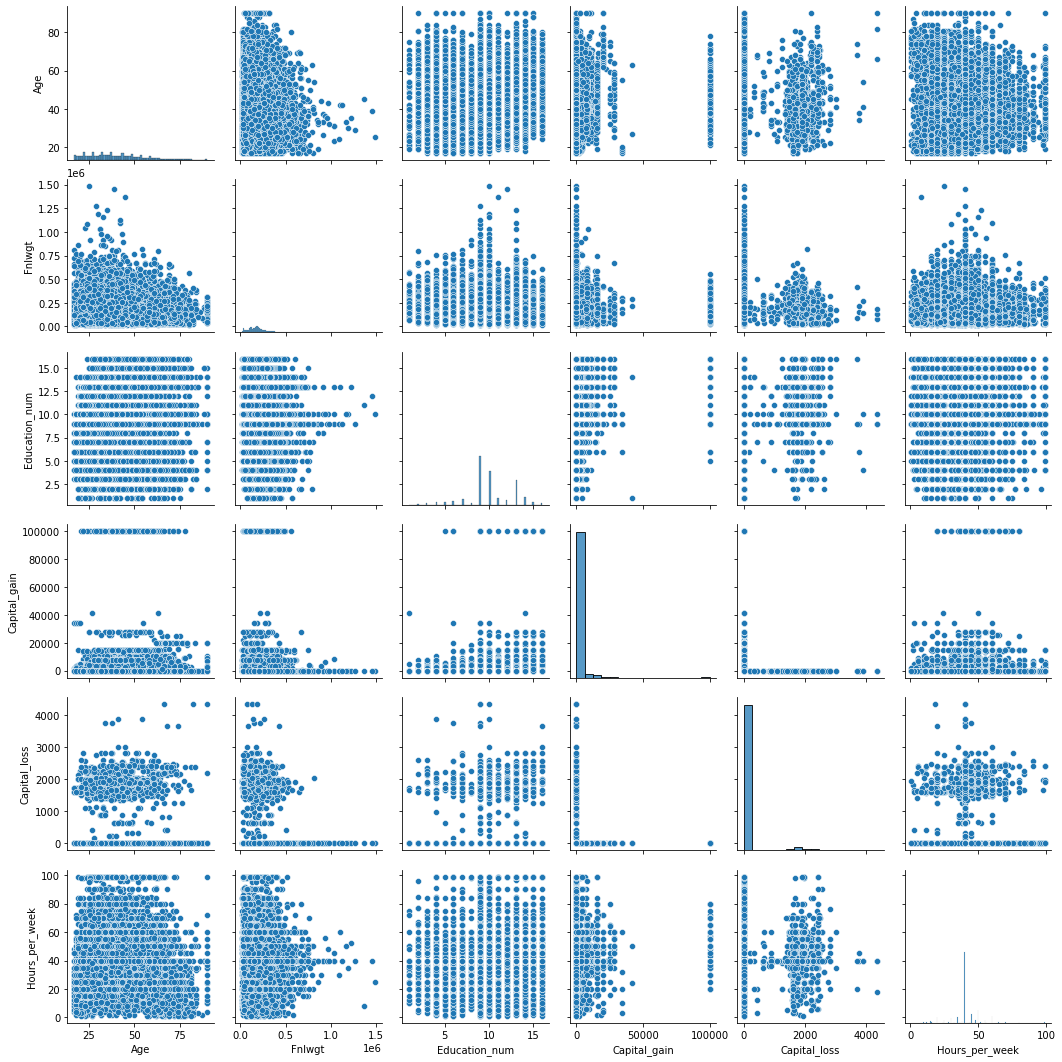

In [33]:
# Creating a pairplot of dataset
sns.pairplot(df)
plt.show()

In [34]:
# Checking the unique values
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [35]:
# Converting Non numeric data into numeric 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Workclass"] = le.fit_transform(df['Workclass'])
df["Education"] = le.fit_transform(df['Education'])
df["Marital_status"] = le.fit_transform(df['Marital_status'])
df["Occupation"] = le.fit_transform(df['Occupation'])
df["Relationship"] = le.fit_transform(df['Relationship'])
df["Race"] = le.fit_transform(df['Race'])
df["Sex"] = le.fit_transform(df['Sex'])
df["Native_country"] = le.fit_transform(df['Native_country'])
df["Income"] = le.fit_transform(df['Income'])



In [36]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [37]:
df.drop(['Workclass' , 'Occupation','Capital_loss',],axis=1,inplace=True)

In [38]:
df

,Age,Fnlwgt,Education,Education_num,Marital_status,Relationship,Race,Sex,Capital_gain,Hours_per_week,Native_country,Income
0,50,83311,9,13,2,0,4,1,0,13,39,0
1,38,215646,11,9,0,1,4,1,0,40,39,0
2,53,234721,1,7,2,0,2,1,0,40,39,0
3,28,338409,9,13,2,5,2,0,0,40,5,0
4,37,284582,12,14,2,5,4,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,7,12,2,5,4,0,0,38,39,0
32556,40,154374,11,9,2,0,4,1,0,40,39,1
32557,58,151910,11,9,6,4,4,0,0,40,39,0
32558,22,201490,11,9,4,3,4,1,0,20,39,0


In [39]:
# Checking Correlation
df.corr()

,Age,Fnlwgt,Education,Education_num,Marital_status,Relationship,Race,Sex,Capital_gain,Hours_per_week,Native_country,Income
Age,1.000000,-0.076646,-0.010508,0.036527,-0.266292,-0.263698,0.028718,0.088832,0.077674,0.068756,-0.001151,0.234039
Fnlwgt,-0.076646,1.000000,-0.028156,-0.043159,0.028184,0.008922,-0.021278,0.026882,0.000437,-0.018770,-0.051957,-0.009481
Education,-0.010508,-0.028156,1.000000,0.359172,-0.038398,-0.010879,0.014135,-0.027349,0.030047,0.055510,0.064291,0.079311
Education_num,0.036527,-0.043159,0.359172,1.000000,-0.069338,-0.094145,0.031825,0.012256,0.122627,0.148127,0.050831,0.335182
Marital_status,-0.266292,0.028184,-0.038398,-0.069338,1.000000,0.185461,-0.068025,-0.129337,-0.043398,-0.190521,-0.023827,-0.199295
Relationship,-0.263698,0.008922,-0.010879,-0.094145,0.185461,1.000000,-0.116052,-0.582453,-0.057918,-0.248975,-0.005504,-0.250924
Race,0.028718,-0.021278,0.014135,0.031825,-0.068025,-0.116052,1.000000,0.087197,0.011143,0.041910,0.137849,0.071853
Sex,0.088832,0.026882,-0.027349,0.012256,-0.129337,-0.582453,0.087197,1.000000,0.048477,0.229312,-0.008125,0.215995
Capital_gain,0.077674,0.000437,0.030047,0.122627,-0.043398,-0.057918,0.011143,0.048477,1.000000,0.078409,-0.001984,0.223333
Hours_per_week,0.068756,-0.018770,0.055510,0.148127,-0.190521,-0.248975,0.041910,0.229312,0.078409,1.000000,-0.002671,0.229690


<AxesSubplot:>

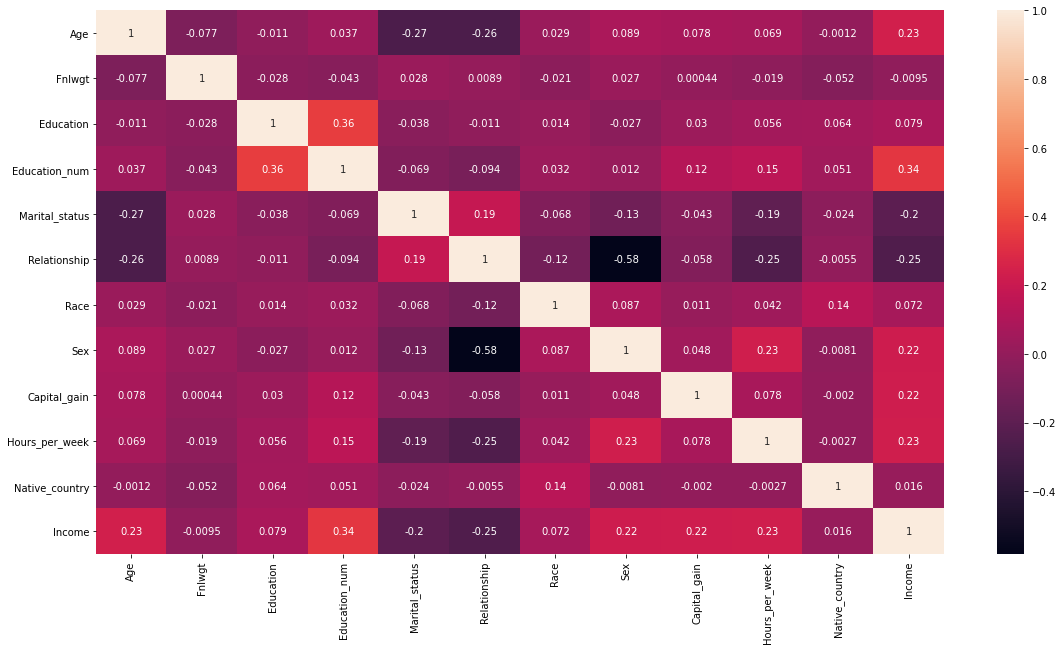

In [40]:
# Plotting correlation heatmap
plt.figure(figsize=[19,10],facecolor='white')
sns.heatmap(df.corr(),annot=True)

In [41]:
# Checking the skewness
df.skew()

Age                0.558738
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

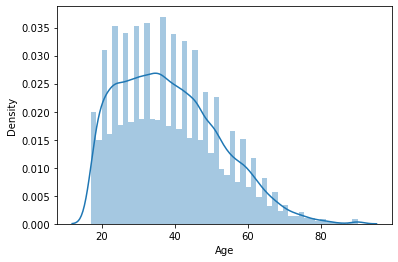

In [42]:
sns.distplot(df['Age'])

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

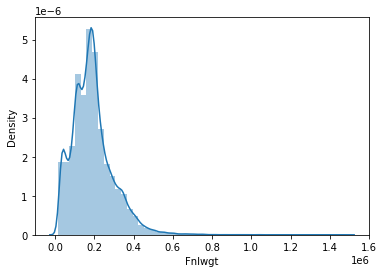

In [43]:
sns.distplot(df['Fnlwgt'])

<AxesSubplot:xlabel='Education', ylabel='Density'>

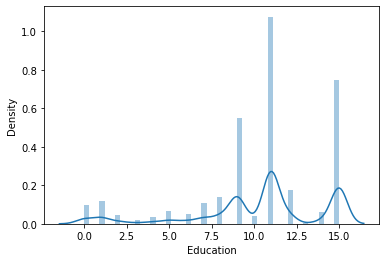

In [44]:
sns.distplot(df['Education'])

<AxesSubplot:xlabel='Education_num', ylabel='Density'>

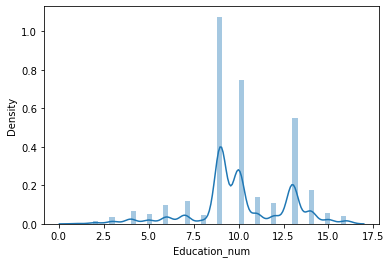

In [45]:
sns.distplot(df['Education_num'])

<AxesSubplot:xlabel='Marital_status', ylabel='Density'>

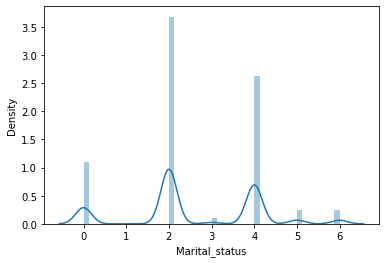

In [46]:
sns.distplot(df['Marital_status'])

<AxesSubplot:xlabel='Relationship', ylabel='Density'>

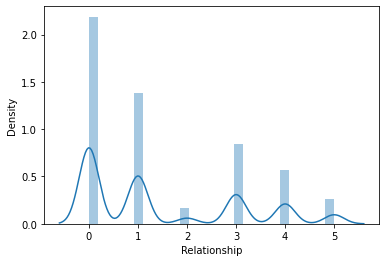

In [47]:
sns.distplot(df['Relationship'])

<AxesSubplot:xlabel='Race', ylabel='Density'>

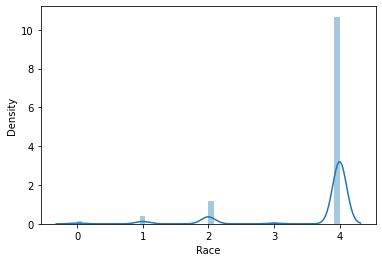

In [48]:
sns.distplot(df['Race'])

<AxesSubplot:xlabel='Sex', ylabel='Density'>

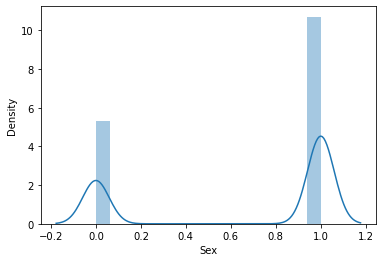

In [49]:
sns.distplot(df['Sex'])

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

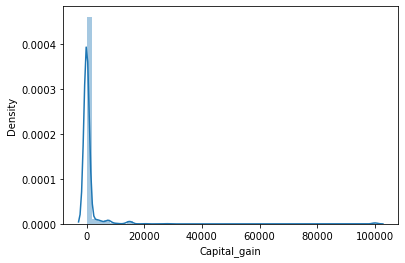

In [50]:
sns.distplot(df['Capital_gain'])

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

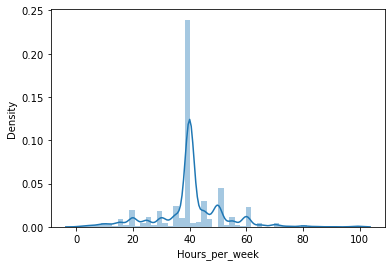

In [51]:
sns.distplot(df['Hours_per_week'])

<AxesSubplot:xlabel='Native_country', ylabel='Density'>

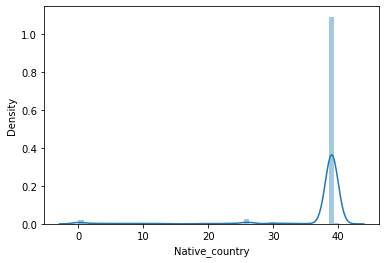

In [52]:
sns.distplot(df['Native_country'])

<AxesSubplot:xlabel='Income', ylabel='Density'>

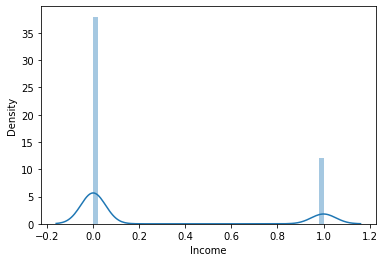

In [53]:
sns.distplot(df['Income'])

From the above plots we cen see skewness in few columns and most of the graphs are bimodal.

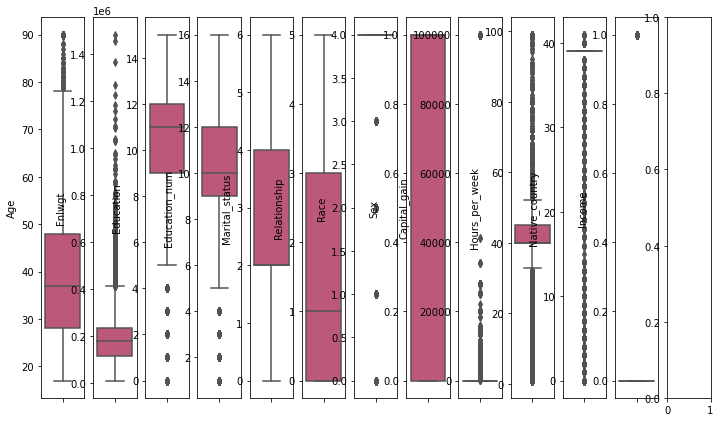

In [54]:
# checking outliers
fig, ax = plt.subplots(ncols=13, nrows=1, figsize=(12,7))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="plasma")
    index += 1
plt.tight_layout(pad=0.2, w_pad=0.9, h_pad=5.0)
plt.show()

 Here We can see outliers in most of the columns which needs to be handled properly.

In [55]:
# Removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.83709708, 1.0087417 , 0.33544266, ..., 2.22212013, 0.29157343,
        0.5632099 ],
       [0.04264043, 0.24504633, 0.18131885, ..., 0.03542999, 0.29157343,
        0.5632099 ],
       [1.05703146, 0.42576955, 2.40248871, ..., 0.03542999, 0.29157343,
        0.5632099 ],
       ...,
       [1.42358875, 0.3588108 , 0.18131885, ..., 0.03542999, 0.29157343,
        0.5632099 ],
       [1.21562378, 0.11092744, 0.18131885, ..., 1.65520046, 0.29157343,
        0.5632099 ],
       [0.98372   , 0.92986178, 0.18131885, ..., 0.03542999, 0.29157343,
        1.77553698]])

In [56]:
threshold=3
print(np.where(z>3))

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64), array([10,  9,  6, ...,  6,  6,  6], dtype=int64))


In [57]:
z[6][8]

0.14591373290363233

In [58]:
df_new=df[(z<3).all(axis=1)]
df_new

,Age,Fnlwgt,Education,Education_num,Marital_status,Relationship,Race,Sex,Capital_gain,Hours_per_week,Native_country,Income
0,50,83311,9,13,2,0,4,1,0,13,39,0
1,38,215646,11,9,0,1,4,1,0,40,39,0
2,53,234721,1,7,2,0,2,1,0,40,39,0
4,37,284582,12,14,2,5,4,0,0,40,39,0
5,49,160187,6,5,3,1,2,0,0,16,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,7,12,2,5,4,0,0,38,39,0
32556,40,154374,11,9,2,0,4,1,0,40,39,1
32557,58,151910,11,9,6,4,4,0,0,40,39,0
32558,22,201490,11,9,4,3,4,1,0,20,39,0


In [59]:
df_new.shape

(28727, 12)

In [60]:
# Checking the percentage of loss data
loss_percent =(32560-28727)/32560*100
print(loss_percent)

11.772113022113022


In [61]:
# Rechecking Skewness after removing Outliers
df_new.skew()

Age               0.469526
Fnlwgt            0.626976
Education        -0.962061
Education_num    -0.137305
Marital_status   -0.024361
Relationship      0.780447
Race             -2.622794
Sex              -0.707088
Capital_gain      5.064269
Hours_per_week   -0.354664
Native_country   -5.558547
Income            1.232554
dtype: float64

In [62]:
# Removing skewness 
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
df[['Fnlwgt','Capital_gain']] = scaler.fit_transform(df[['Fnlwgt','Capital_gain']].values)

In [63]:
# Rechecking skewness
df_new.skew()

Age               0.469526
Fnlwgt            0.626976
Education        -0.962061
Education_num    -0.137305
Marital_status   -0.024361
Relationship      0.780447
Race             -2.622794
Sex              -0.707088
Capital_gain      5.064269
Hours_per_week   -0.354664
Native_country   -5.558547
Income            1.232554
dtype: float64

Skewness has been reduced significantly.

In [64]:
# Splitting the dataset
y = df_new['Income']
x = df_new.drop(columns=['Income'], axis=1)

In [65]:
# Scaling the data
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Age,Fnlwgt,Education,Education_num,Marital_status,Relationship,Race,Sex,Capital_gain,Hours_per_week,Native_country
0,0.874480,-1.085640,-0.351146,1.196495,-0.397899,-0.901468,0.340946,0.707125,-0.238910,-2.423154,0.190963
1,-0.022457,0.312835,0.167765,-0.453413,-1.722095,-0.278897,0.340946,0.707125,-0.238910,-0.003821,0.190963
2,1.098714,0.514414,-2.426792,-1.278367,-0.397899,-0.901468,-2.988767,0.707125,-0.238910,-0.003821,0.190963
3,-0.097202,1.041329,0.427221,1.608972,-0.397899,2.211389,0.340946,-1.414177,-0.238910,-0.003821,0.190963
4,0.799735,-0.273238,-1.129514,-2.103321,0.264198,-0.278897,-2.988767,-1.414177,-0.238910,-2.154340,-5.726432
...,...,...,...,...,...,...,...,...,...,...,...
28722,-0.844649,0.753043,-0.870058,0.784018,-0.397899,2.211389,0.340946,-1.414177,-0.238910,-0.183031,0.190963
28723,0.127033,-0.334668,0.167765,-0.453413,-0.397899,-0.901468,0.340946,0.707125,-0.238910,-0.003821,0.190963
28724,1.472438,-0.360707,0.167765,-0.453413,2.250492,1.588817,0.340946,-1.414177,-0.238910,-0.003821,0.190963
28725,-1.218373,0.163239,0.167765,-0.453413,0.926296,0.966246,0.340946,0.707125,-0.238910,-1.795920,0.190963


In [66]:
maxaccu = 0
maxRS = 0

for i in range (1, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > maxaccu:
        maxaccu = acc
        maxRS = i
print ('Max Accuracy is', maxaccu, 'on Random State', maxRS)

Max Accuracy is 0.8331592992226476 on Random State 415


In [67]:
#Splitting data into train test split.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 415)

In [68]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)
print(lr.score(x_train,y_train))
lr_predict=lr.predict(x_test)

0.2718522573123544


In [69]:
from sklearn.metrics import mean_absolute_error
print('MSE:',mean_squared_error(lr_predict,y_test))
print('MAE:',mean_absolute_error(lr_predict,y_test))
print('r2_score:',r2_score(lr_predict,y_test))

MSE: 0.1244755646686663
MAE: 0.2798204048051545
r2_score: -1.39513969989637


In [70]:
from sklearn.metrics import classification_report, confusion_matrix
LR = LogisticRegression()

# feeding the training set into the model
LR.fit(x_train, y_train)

# predicting the results for the test set
y_pred = LR.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", LR.score(x_train, y_train))
print("Testing accuracy :", LR.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.8167893375770837
Testing accuracy : 0.8331592992226476
              precision    recall  f1-score   support

           0       0.85      0.94      0.90      6638
           1       0.71      0.46      0.56      1981

    accuracy                           0.83      8619
   macro avg       0.78      0.70      0.73      8619
weighted avg       0.82      0.83      0.82      8619

[[6263  375]
 [1063  918]]


In [71]:
# USING DECISION TREE
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

Training accuracy : 0.9995026854983091
Testing accuracy : 0.7974242951618518


In [72]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      6638
           1       0.55      0.60      0.58      1981

    accuracy                           0.80      8619
   macro avg       0.72      0.73      0.72      8619
weighted avg       0.80      0.80      0.80      8619

[[5686  952]
 [ 794 1187]]


In [73]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators = 200)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

Training accuracy : 0.9995026854983091
Testing accuracy : 0.8386123680241327


In [74]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      6638
           1       0.66      0.60      0.63      1981

    accuracy                           0.84      8619
   macro avg       0.77      0.76      0.76      8619
weighted avg       0.83      0.84      0.84      8619

[[6037  601]
 [ 790 1191]]


In [75]:
# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge

np.random.seed(10)
def rmse_cv(model,x,y):
    rmse =-(cross_val_score(model,x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)

models = [LinearRegression(),
         Ridge(),
         SVR(kernel='linear'),
         SVR(kernel='poly'),
         SVR(kernel='rbf'),
         RandomForestRegressor(),
         DecisionTreeRegressor(),
         GradientBoostingRegressor(),]

names = ['LR','R','svr','svr_p','svr_r','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}   : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR   : 0.130630, 0.001680
R   : 0.130630, 0.001680
svr   : 0.159465, 0.001698
svr_p   : 0.139165, 0.003009
svr_r   : 0.122043, 0.004064
RF   : 0.116815, 0.003571
DTR   : 0.202414, 0.006337
GBR   : 0.101477, 0.002547


In [76]:
# Hypertuning
from sklearn.model_selection import RandomizedSearchCV


n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [77]:
rf1=RandomForestRegressor()
rf_randomized=RandomizedSearchCV(estimator=rf1,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

In [78]:
rf_randomized.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]},
                   random_state=100, verbose=2)

In [79]:
rf_randomized.best_params_

{'n_estimators': 822,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [80]:
rf_final=rf_randomized.best_estimator_

In [81]:
y_pred_random=rf_final.predict(x_test)

Hence, we can see that Random Forest gives us the best accuracy score of 85 %

In [82]:
# AUC ROC
auc = roc_auc_score(y_test, y_pred)
auc

0.7553360951333541

In [83]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [84]:
fpr

array([0.        , 0.09053932, 1.        ])

In [85]:
tpr

array([0.        , 0.60121151, 1.        ])

In [86]:
thresholds

array([2, 1, 0])

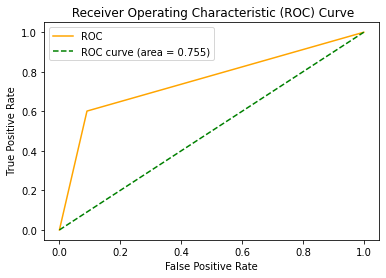

In [87]:
# Plotting AUC ROC Curve
plt.plot(fpr, tpr, color='orange',label='ROC')
plt.plot([0, 1],[0, 1], color='green', linestyle='--', label='ROC curve (area = %0.3f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel(' True Positive Rate')
plt.title(' Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [88]:
# Saving The model
import pickle
file = 'CENSUS INCOME.pkl'
#save file
save = pickle.dump(RandomForestRegressor,open(file,'wb'))

In [89]:
# Conclusion
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_com=pd.DataFrame({"original":a, "predicted":predicted}, index=range(len(a)))
df_com

,original,predicted
0,0,0.201207
1,0,0.223189
2,0,0.106384
3,0,-0.003435
4,1,0.741845
...,...,...
8614,0,0.328158
8615,1,0.706127
8616,0,0.294560
8617,0,0.000756


We can say that , the prediction is showing a similar relationship with the actual loan status from the train data set, which means the model is predicted correctly.